# Implementação em Python de codificações digitais

**Sumário:**

  - Unipolar 
    - RZ
    - NRZ
  - Bipolar 
    - RZ
    - NRZ
  - Polar Quaternário NRZ
  - NRZI
      - NRZM
      - NRZS
  - Manchester
  
---

## Informação não codificada
Abaixo é instanciado uma informação não codificada `uncoded_data`, para ser utilizado como teste para todas as codificações a serem implementadas.
Também é definida o período de bit `bit_period` e de amostragem `sampling_period`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from scipy.signal import decimate

if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    uncoded_data = np.array([0b10110010], dtype=np.uint8)
    bit_period = 1  # 100e-6
    sampling_period = 0.1  # 100e-9

    print(f'uncoded data: {uncoded_data}')
    print(f'bit period: {bit_period} s')
    print(f'sampling period: {sampling_period} s')

uncoded data: [178]
bit period: 1 s
sampling period: 0.1 s


## Unipolar RZ (Return-to-Zero)

In [2]:
_ = np.array([0,1,2,3,4,5,6,7,8,9])
_[0::2]

array([0, 2, 4, 6, 8])

Encoding: Unipolar RZ
uncoded data: [178]
encoded data: [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
decoded data: [178]


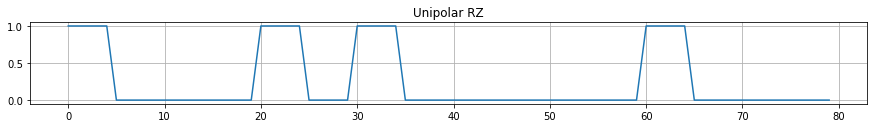

In [3]:
def encode_unipolar_rz(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * (length // 2)
        else:
            symbol = [0] * (length // 2)
        symbol += [0] * (length // 2)
        symbols += symbol

    return np.array(symbols)

def threshold_unipolar_rz(signal:np.array, high_level:float=1) -> np.array:
    signal[signal > high_level / 2] = high_level
    signal[signal <= high_level / 2] = 0
    return signal

def decode_unipolar_rz(signal: np.array,
                       bit_period: float =1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:
      
    length = int(bit_period / sampling_period)

    symbol1 = [high_level] * (length // 2) + [0] * (length // 2)
    symbol0 = [0] * (length)
    
    symbols = np.array_split(signal, len(signal) // length)
    bitarray = []
    for symbol in symbols:
        if np.correlate(symbol1, symbol).mean() > np.correlate(symbol0, symbol).mean():
            bitarray += [1]
        else:
            bitarray += [0]
    
    bitarray = np.array(bitarray, dtype=np.uint8)
    return np.packbits(bitarray)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Unipolar RZ')
    print(f'uncoded data: {uncoded_data}')
    encoded_data = encode_unipolar_rz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Unipolar RZ')
    plt.plot(encoded_data)
    plt.grid()
    
    decoded_data = decode_unipolar_rz(
        encoded_data, bit_period, sampling_period)
    print(f'decoded data: {decoded_data}')

## Unipolar NRZ (Non-Return-to-Zero)

Encoding: Unipolar NRZ
uncoded data: [178]
encoded data: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0]
decoded data: [178]


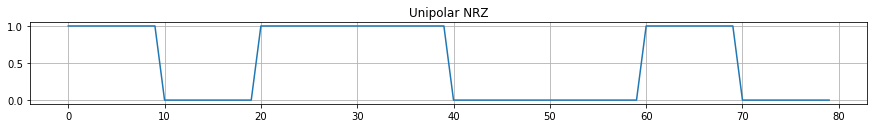

In [4]:
def encode_unipolar_nrz(data: np.array,
                        bit_period: float = 1,
                        sampling_period: float = 0.1,
                        high_level: float = 1
                        ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * length
        else:
            symbol = [0] * length
        symbols += symbol

    return np.array(symbols)

def decode_unipolar_nrz(signal:np.array, high_level:float=1) -> np.array:
    signal[signal > 0] = high_level
    signal[signal <= 0] = -high_level
    return signal

def decode_unipolar_nrz(signal: np.array,
                       bit_period: float =1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:
    
    length = int(bit_period / sampling_period)

    symbol1 = [high_level] * (length)
    symbol0 = [0] * (length)
    
    symbols = np.array_split(signal, len(signal) // length)
    bitarray = []
    for symbol in symbols:
        if np.correlate(symbol1, symbol) > np.correlate(symbol0, symbol):
            bitarray += [1]
        else:
            bitarray += [0]

    bitarray = np.array(bitarray, dtype=np.uint8)
    return np.packbits(bitarray)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Unipolar NRZ')
    print(f'uncoded data: {uncoded_data}')
    encoded_data = encode_unipolar_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Unipolar NRZ')
    plt.plot(encoded_data)
    plt.grid()
    
    decoded_data = decode_unipolar_nrz(
        encoded_data, bit_period, sampling_period)
    print(f'decoded data: {decoded_data}')

##  Bipolar RZ (Return-to-Zero)

Encoding: Bipolar RZ
uncoded data: [178]
encoded data: [ 1  1  1  1  1  0  0  0  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1
  1  0  0  0  0  0  1  1  1  1  1  0  0  0  0  0 -1 -1 -1 -1 -1  0  0  0
  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1  1  0  0  0  0  0 -1 -1
 -1 -1 -1  0  0  0  0  0]
decoded data: [178]


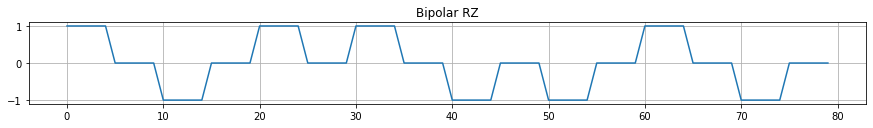

In [5]:
def encode_bipolar_rz(data: np.array,
                      bit_period: float = 1,
                      sampling_period: float = 0.1,
                      high_level: float = 1
                      ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * (length // 2)
        else:
            symbol = [-high_level] * (length // 2)
        symbol += [0] * (length // 2)
        symbols += symbol

    return np.array(symbols)

def decode_bipolar_rz(signal: np.array,
                       bit_period: float =1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:
    
    length = int(bit_period / sampling_period)

    symbol1 = [high_level] * (length // 2) + [0] * (length // 2)
    symbol0 = [-high_level] * (length // 2) + [0] * (length // 2)
    
    symbols = np.array_split(signal, len(signal) // length)
    bitarray = []
    for symbol in symbols:
        if np.correlate(symbol1, symbol) > np.correlate(symbol0, symbol):
            bitarray += [1]
        else:
            bitarray += [0]

    bitarray = np.array(bitarray, dtype=np.uint8)
    return np.packbits(bitarray)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Bipolar RZ')
    print(f'uncoded data: {uncoded_data}')
    encoded_data = encode_bipolar_rz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Bipolar RZ')
    plt.plot(encoded_data)
    plt.grid()
    
    decoded_data = decode_bipolar_rz(
        encoded_data, bit_period, sampling_period)
    print(f'decoded data: {decoded_data}')

## Polar Quaternário NRZ (Non-Return-to-Zero)

Encoding: Polar Quaternary NRZ
uncoded data: [178]
encoded data: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]
decoded data: [178]


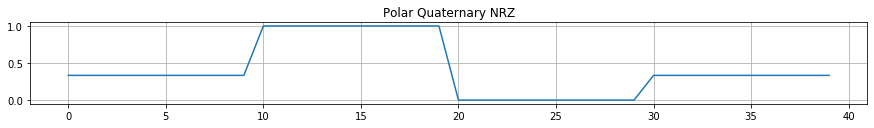

In [6]:
def encode_polar4_nrz(data: np.array,
                      bit_period: float = 1,
                      sampling_period: float = 0.1,
                      high_level: float = 1
                      ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bits in bitarray.reshape(len(bitarray) // 2, 2):
        num = int(str(bits[1]) + str(bits[0]), 2)
        symbol = [high_level * num / 3.] * length
        symbols += symbol

    return np.array(symbols)

def decode_polar4_nrz(signal: np.array,
                       bit_period: float =1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:
    
    length = int(bit_period / sampling_period)

    threshold01 = (high_level * 1 / 6)
    threshold10 = (high_level * 3 / 6)
    threshold11 = (high_level * 5 / 6)
    
    symbols = np.array_split(signal, len(signal) // length)
    bitarray = []
    for symbol in symbols:
        if(symbol.mean() > threshold11):
            bitarray += [1, 1]
        elif(symbol.mean() > threshold10):
            bitarray += [0, 1]
        elif(symbol.mean() > threshold01):
            bitarray += [1, 0]
        else:
            bitarray += [0, 0]

    bitarray = np.array(bitarray, dtype=np.uint8)
    return np.packbits(bitarray)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Polar Quaternary NRZ')
    print(f'uncoded data: {uncoded_data}')
    encoded_data = encode_polar4_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Polar Quaternary NRZ')
    plt.plot(encoded_data)
    plt.grid()
        
    decoded_data = decode_polar4_nrz(
        encoded_data, bit_period, sampling_period)
    print(f'decoded data: {decoded_data}')

##  Bipolar NRZ (Non-Return-to-Zero)

Encoding: Bipolar NRZ
encoded data: [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


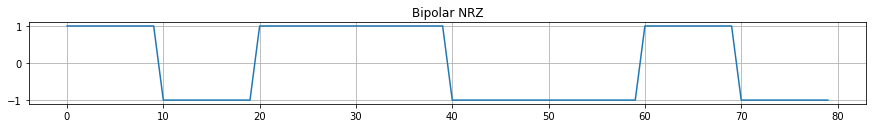

In [7]:
def encode_bipolar_nrz(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if int(bit) == 1:
            symbol = [high_level] * length
        else:
            symbol = [-high_level] * length
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Bipolar NRZ')
    encoded_data = encode_bipolar_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Bipolar NRZ')
    plt.plot(encoded_data)
    plt.grid()

## NRZM (Non-Return-to-Zero Mark)

Encoding: NRZM
encoded data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


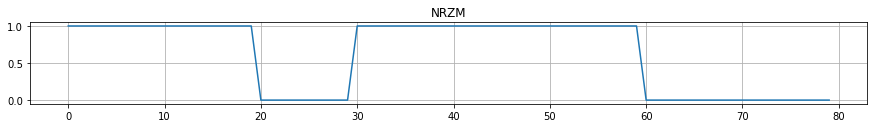

In [8]:
def encode_nrzm(data: np.array,
                bit_period: float = 1,
                sampling_period: float = 0.1,
                high_level: float = 1
                ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    def _encode_nrzm_(bit):
        if not hasattr(_encode_nrzm_, "level"):
            _encode_nrzm_.level = 0

        if bit == 1:
            _encode_nrzm_.level ^= 1

        symbol = [_encode_nrzm_.level * high_level] * length
        return symbol

    for bit in bitarray:
        symbols += _encode_nrzm_(bit)

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: NRZM')
    encoded_data = encode_nrzm(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('NRZM')
    plt.plot(encoded_data)
    plt.grid()

## NRZS (Non-Return-to-Zero Space)

Encoding: NRZS
encoded data: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0]


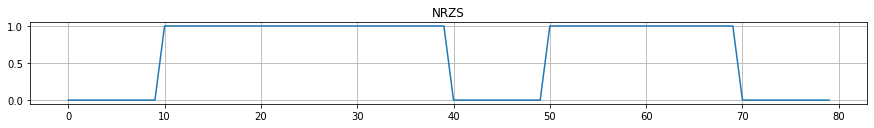

In [9]:
def encode_nrzs(data: np.array,
                bit_period: float = 1,
                sampling_period: float = 0.1,
                high_level: float = 1
                ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    def _encode_nrzs_(bit):
        if not hasattr(encode_nrzs, "level"):
            encode_nrzs.level = 0

        if bit == 0:
            encode_nrzs.level ^= 1

        symbol = [encode_nrzs.level * high_level] * length
        return symbol

    for bit in bitarray:
        symbols += _encode_nrzs_(bit)

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: NRZS')
    encoded_data = encode_nrzs(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('NRZS')
    plt.plot(encoded_data)
    plt.grid()

##  Manchester

Encoding: Manchester
encoded data: [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0]


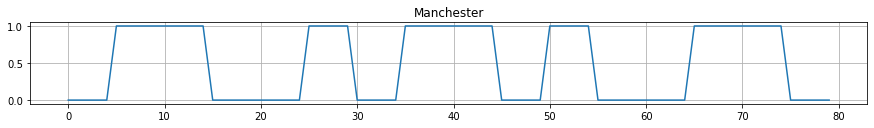

In [10]:
def encode_manchester(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period / sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        clock = [1] * (length//2) + [0] * (length//2)
        symbol = list((np.array(clock) ^ bit) * high_level)
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Manchester')
    encoded_data = encode_manchester(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Manchester')
    plt.plot(encoded_data)
    plt.grid()